# Python and R

This setup allows you to use *Python* and *R* in the same notebook.

This is an adaptation from: https://github.com/dmil/jupyter-quickstart, special thanks and credit to Dhrumil Mehta 

In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

This is a Python notebook, but below is an R cell. The `%%R` at the top of the cell indicates that the code in this cell will be R code.

In [3]:
%%R

# My commonly used R imports

require('tidyverse')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Loading required package: tidyverse


Below is a Python cell, there is nothing at the top of the cell because it is python by default.

In [8]:
# EXAMPLE PYTHON CELL

# create a dataframe of random numbers with two columns, A and B
df = pd.DataFrame(
    np.random.randint(0,100,size=(100, 2)), columns=list('AB'))

# display first 5 rows
df.head(5)

,A,B
0,52,67
1,83,5
2,81,98
3,98,66
4,23,7


Now another R cell, `%%R -i df` indicates that this is an R cell and imports the dataframe from Python. This is one way to pass data back and forth from R to Python. Another is to write a CSV file in Python and read it in R (or vice versa)

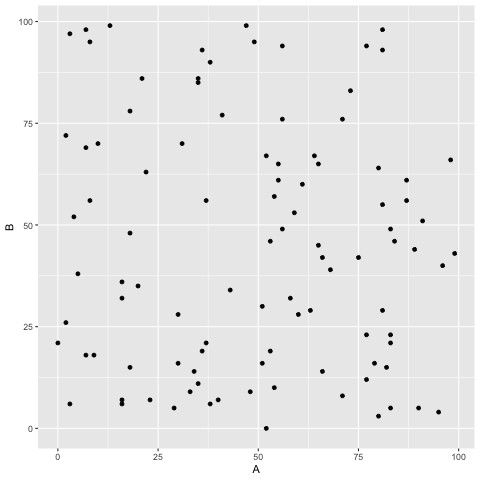

In [9]:
%%R -i df

# Plotting using R
plt <- ggplot(df) +
    geom_point(aes(A,B))

plt

You can also use dataframes from R cell in Python cell

In [12]:
%%R

# Create a small random DataFrame
id <- data.frame(
  Name = paste("Name", 1:10),
  Age = sample(18:65, 10, replace = TRUE)
)

# View the DataFrame
print(id)

      Name Age
1   Name 1  39
2   Name 2  34
3   Name 3  55
4   Name 4  31
5   Name 5  40
6   Name 6  42
7   Name 7  51
8   Name 8  57
9   Name 9  54
10 Name 10  53


Now to use the new id dataframe in Python, you need to output this df from R to a variable with `%%R -o id id` 

In [16]:
id_py = %R -o id id

id_py.head(5)

,Name,Age
1,Name 1,39
2,Name 2,34
3,Name 3,55
4,Name 4,31
5,Name 5,40
